<a href="https://colab.research.google.com/github/anmolsabharwal/Project/blob/master/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Uploading the Dataset.csv file from the desktop

from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (2).csv


In [ ]:
#import the csv to dataframe

import io
df = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))

In [ ]:
#Top 5 rows of our dataset

df.head()

In [ ]:
#Checking the dimensions of our dataframe

df.shape

In [ ]:
#exploring the types of each column

df.info()

In [ ]:
#Checking the null values in our dataset

df.isnull().sum()

In [ ]:
df.columns

In [ ]:
#Dropping the irrelevant columns
df.drop(['PPE','Account Manager','Client Service Representative','Effective Date','Expiration Date','Client Code','Producer '],axis=1,inplace=True)


In [ ]:
#Checking the dimensions of our dataframe after dropping the columns

df.shape

In [ ]:
#Dropping the null values from the dataframe

df.dropna(axis=0,inplace=True)

In [ ]:
#Dimensions of the dataframe after dropping the null values

df.shape

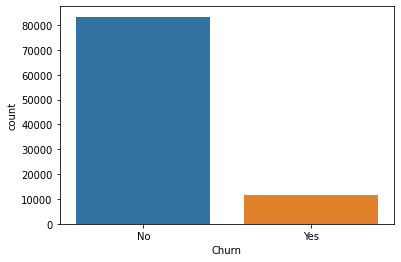

In [ ]:
sns.countplot(df['Churn'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
branch=pd.get_dummies(df['Branch Name'],prefix='Branch')
df=pd.concat([df,branch],axis=1)
df.drop('Branch Name',axis=1,inplace=True)
df.head()


In [ ]:
lt=pd.get_dummies(df['Line Type'],prefix='LT')
df=pd.concat([df,lt],axis=1)
df.drop('Line Type',axis=1,inplace=True)
df.head()


In [ ]:

df.drop(['Line Status','ICO'],axis=1,inplace=True)
df.head()


In [ ]:
plt.figure(figsize=(200,100))
sns.heatmap(df.corr(),annot=True)

In [ ]:
c=df.corr().abs()
cor_target = c['Churn']
# relevant_features = cor_target[cor_target>0.3]
# relevant_features
pd.set_option('display.max_rows', None)
cor_target.sort_values(ascending=False)

In [ ]:
df=df.replace([np.inf, -np.inf], np.nan)

df=df.dropna()

In [ ]:
X1=df.drop(['Churn','Commision'],axis=1)
y1=df['Churn']
X1.head()
X1.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

names = list(X1.columns.values)
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X1,y1)
 
# print ("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(sum(y_train==0))
print(sum(y_train==1))



55879
7793


In [ ]:
smote=SMOTE(sampling_strategy='all')
X_train,y_train=smote.fit_sample(X_train,y_train)
print(sum(y_train==0))
print(sum(y_train==1))

55879
55879


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train,y_train)
predict=lr_model.predict(X_test)
out=pd.DataFrame({'Actual':y_test,'Predicted':predict})
out.head()

,Actual,Predicted
18042,0,0
20761,0,0
21056,1,1
28623,0,0
67279,0,0


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     27495
           1       0.40      0.77      0.53      3867

    accuracy                           0.83     31362
   macro avg       0.68      0.80      0.71     31362
weighted avg       0.89      0.83      0.85     31362



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 4,class_weight='balanced')
rf_model_initial.fit(X_train,y_train)
predict1=rf_model_initial.predict(X_test)
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27495
           1       0.93      0.94      0.93      3867

    accuracy                           0.98     31362
   macro avg       0.96      0.96      0.96     31362
weighted avg       0.98      0.98      0.98     31362

